<h1><center><font size="6">Time series analysis with real estate market data</font></center></h1>

# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Reading data</a>  
- <a href='#3'>Exploring data</a>   
- <a href='#4'>Feature engineering</a>
- <a href='#5'>Conclusion</a>

# <a id='1'>Introduction</a>  

This data comes from the Zillow Research website and it contains the median estimated home values for 4 bedroom in the Lamorinda area.
Lamorinda is located in the east bay of San Francisco, Contra Costa county, and the towns are: Lafayette, Moraga, and Orinda.
This area is known for outsdanding public schools and BART, Bay Area Rapid Transit, proximity.
The real estate market has been very competitive in the last years and most of the houses are sold for more than the asking price.
Zip_Zhvi_4bedroom
Disclaimer: I'm not a real estate professional. I'm just using this dataset to practice time series analysis


In [1]:
#<a id='2'>Prepare the data analysis</a>
## Load packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics import tsaplots


#<a id='2'>Prepare the data analysis</a>
## Load data file

In [3]:
data = pd.read_csv('4bedroom.csv', parse_dates=['Date'], index_col='Date') # importing as a data series

<a id='3'>Exploring data</a>
### Statistics

In [4]:
data.head()

,Lafayette,Orinda,Moraga
Date,,,
1996-04-01,379300,419000,412800
1996-05-01,382100,421100,412400
1996-06-01,385200,423200,412100
1996-07-01,388300,425200,411700
1996-08-01,391200,427100,411300


In [5]:
data.info()
# No missing values to take care

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 1996-04-01 to 2018-09-01
Data columns (total 3 columns):
Lafayette    270 non-null int64
Orinda       270 non-null int64
Moraga       270 non-null int64
dtypes: int64(3)
memory usage: 8.4 KB


In [6]:
data.describe()
# Orinda has the highest price with the highest variance.

,Lafayette,Orinda,Moraga
count,2.700000e+02,2.700000e+02,2.700000e+02
mean,9.591230e+05,1.081054e+06,9.411870e+05
std,3.580769e+05,3.747719e+05,2.927794e+05
min,3.793000e+05,4.190000e+05,4.108000e+05
25%,7.372750e+05,7.957500e+05,7.820750e+05
50%,9.260000e+05,1.127200e+06,9.203500e+05
75%,1.158775e+06,1.328575e+06,1.147700e+06
max,1.763400e+06,1.863700e+06,1.468000e+06


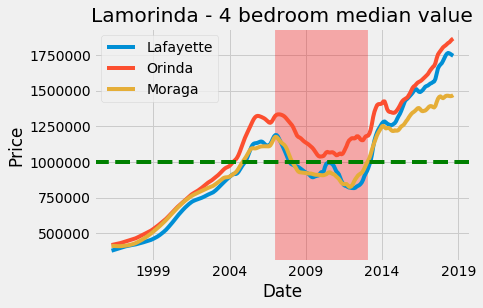

In [7]:
# Plotting all data highlighting the great recession

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')
ax = data.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Lamorinda - 4 bedroom median value')
ax.axhline(y=1000000, color='green', linestyle='--')
ax.axvspan('2007-01-01','2013-01-01', color='red', alpha=0.3)
plt.show()
# Median sold prices didn't go below $1M in Orinda during the great recession. Since 2012, the prices have a positive trend.


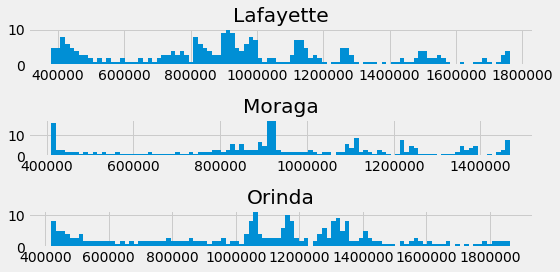

In [8]:
# Plotting an histogram to visualize overall spread
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3 , figsize=(8, 4))
ax0.hist(data['Lafayette'], bins=100)
ax0.set_title('Lafayette')
ax1.hist(data['Moraga'], bins=100)
ax1.set_title('Moraga')
ax2.hist(data['Orinda'], bins=100)
ax2.set_title('Orinda')
fig.tight_layout()
plt.show()

# It is hard to visualize outliers in a so large data range

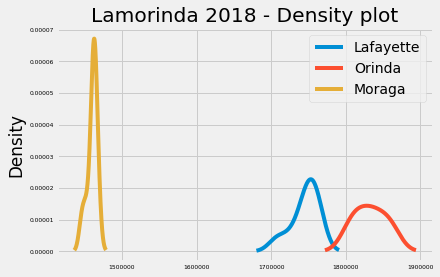

In [9]:
# let's limit to 2018.

data_2018 = data['2018']
ax = data_2018.plot(kind='density', linewidth=4, fontsize=6)
ax.set_title('Lamorinda 2018 - Density plot')
plt.show()

# It confirms Orinda has the highest price with the highest variance.


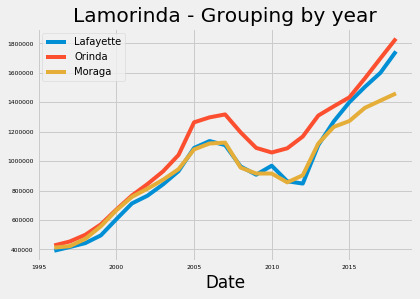

,Lafayette,Orinda,Moraga
Date,,,
2014,1.270492e+06,1.372800e+06,1.232950e+06
2015,1.400233e+06,1.433650e+06,1.272617e+06
2016,1.504575e+06,1.562708e+06,1.362225e+06
2017,1.600358e+06,1.698717e+06,1.411233e+06
2018,1.745567e+06,1.832778e+06,1.460289e+06


In [10]:
# Let's group by year

index_year = data.index.year
data_by_year = data.groupby(index_year).mean()
ax = data_by_year.plot(fontsize = 6 )
ax.set_title('Lamorinda - Grouping by year')
plt.legend(fontsize=10)
plt.show()
data_by_year.tail()

No handles with labels found to put in legend.


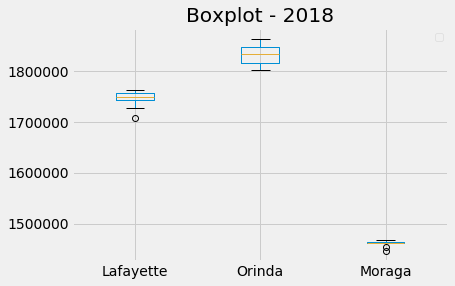

In [11]:
# Plotting a boxplot to visualize the minimum, median, quartiles, and maximum on 2018.

ax = data['2018'].boxplot()
ax.set_title('Boxplot - 2018')
plt.legend(fontsize=10)
plt.show()

# Both Lafayette and Moraga have outliers. It may be some houses were extremely out of shape or lucky buyers!

In [12]:
### <a id='4'>Feature engineering</a>  

#### Downsampling: aggregate existing data
# Calculate year returns here
data_yearly = data.resample('Y').last()
data_yearly_return = data_yearly.pct_change().mul(100)

data_yearly_return.tail(7)

,Lafayette,Orinda,Moraga
Date,,,
2012-12-31,11.913753,1.778315,18.024452
2013-12-31,36.682268,19.296014,26.758974
2014-12-31,2.349287,-3.718450,-1.310786
2015-12-31,14.651416,10.722198,9.559728
2016-12-31,3.963353,7.076164,2.342288
2017-12-31,10.424962,11.479290,6.105586
2018-12-31,3.085836,4.128953,1.164634


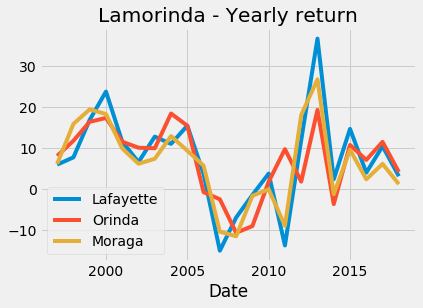

In [13]:
ax = data_yearly_return.plot()
ax.set_title('Lamorinda - Yearly return')
plt.show()

# The best year return was 2013 since the prices were previously very low. It is surprising that on 2014 the return was negative 
# for Orinda and Moraga.

In [14]:
# Let's check the prices for December 2013 and 2014.

data[data.index.month == 12].tail()        
# There was a reduction in price but let's remember these prices are the median estimated value.
# So, potentialy the housess sold in 2014 were in a worse shape or they were in less demanding neighborhoods compared to 2013

,Lafayette,Orinda,Moraga
Date,,,
2013-12-01,1255700,1406500,1235900
2014-12-01,1285200,1354200,1219700
2015-12-01,1473500,1499400,1336300
2016-12-01,1531900,1605500,1367600
2017-12-01,1691600,1789800,1451100


In [15]:
#### Upsampling

# Now upsampling it for practicing. It doesn't add any value to the analysis.

# Upsampling: fill or interpolate missing data
# Calculate quarterly returns here
data_daily =  data.resample('D').fillna('backfill')
data_daily.tail()

,Lafayette,Orinda,Moraga
Date,,,
2018-08-28,1743800,1863700,1468000
2018-08-29,1743800,1863700,1468000
2018-08-30,1743800,1863700,1468000
2018-08-31,1743800,1863700,1468000
2018-09-01,1743800,1863700,1468000


In [16]:
#### Normalizing Multiple Series

# Here, I'm normalizing the data, dividing by the first value. So, all starts with 1, to compare performance.
normalized = data.div(data.iloc[0]) #
normalized.head(3)

,Lafayette,Orinda,Moraga
Date,,,
1996-04-01,1.000000,1.000000,1.000000
1996-05-01,1.007382,1.005012,0.999031
1996-06-01,1.015555,1.010024,0.998304


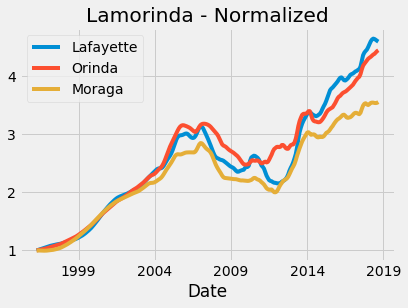

In [17]:
ax = normalized.plot()
ax.set_title('Lamorinda - Normalized')
plt.show()

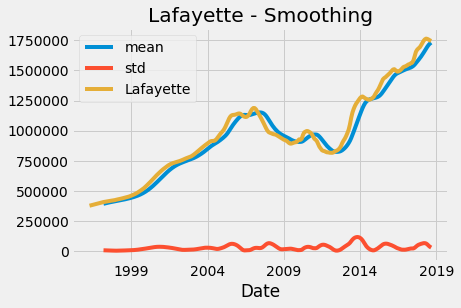

In [18]:
#### Going deep in Lafayette's data

# Smoothing the Lafayette data and calculating standard deviation
# Useful technique when there are outliers and noise
# Compute the 12 months rolling mean of the data DataFrame
rolling = data['Lafayette'].rolling(window=12).agg(['mean','std'])

# Join rolling_stats with
stats = rolling.join(data['Lafayette'])

# Plot stats
ax = stats.plot()
ax.set_title('Lafayette - Smoothing')
plt.show()

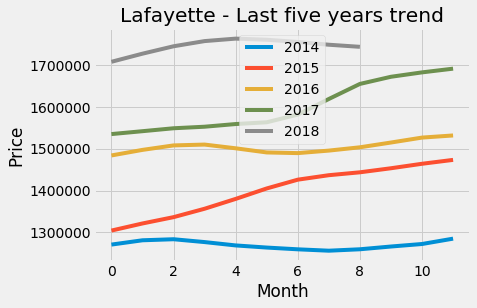

In [19]:
# Price trend on the last five years in Lafayette
sales = pd.DataFrame()

for year in ['2014', '2015', '2016', '2017', '2018']:
    sales_per_year = data.loc[year , ['Lafayette']].reset_index(drop=True)
    sales_per_year.rename(columns={'Lafayette': year}, inplace=True)
    sales = pd.concat([sales, sales_per_year], axis=1)

ax = sales.plot()
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_title('Lafayette - Last five years trend')
plt.show()

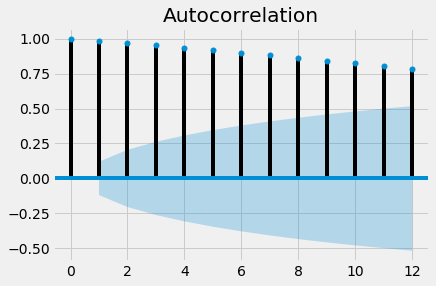

In [20]:
## Autocorrelation and Partial Autocorrelation
# Autocorrelation: correlation with a lagged version
# Partial Autocorrelation: sames as autocorrelation but it removes the effect of previous time points.

fig = tsaplots.plot_acf(data['Lafayette'], lags=12)
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_title('Lafayette - Autocorrelation')
plt.show()

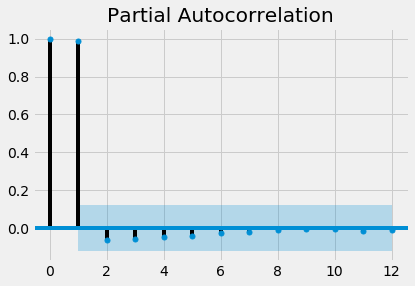

In [21]:
# The values are close to 1, so there is a strong positive correlations between the consecutive observations.
# The blue shade is the confidence interval region. Since the autocorrelation value goes beyond the blue shade,
# the autocorrelation is statistically significant.

fig = tsaplots.plot_pacf(data['Lafayette'], lags=12)
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_title('Lafayette - Autocorrelation')
plt.show()

In [22]:
# <a id='1'>Conclusion</a>

# The Lamorinda market recovered completely from the great recession.
# Orinda continues to be the most expensive town in Lamorinda.
# Lafayette is catching up Orinda leaving Moraga behind.
# The best year return was 2013 in Lafayette.
# The normalized graph shows Lafayette and Orinda had the most return.
# A deeper study with the real sales datapoints (and not grouped by month) would be interesting to better understand the market
# and which town has the largest and scarce inventory.
